In [1]:
# ── 1) Instalace balíčků (spustit v samostatné buňce)
!pip -q install geopandas geodatasets pyogrio shapely fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 50.1 MB/s eta 0:00:00


In [2]:
# ── 2) Importy
import geopandas as gpd           # GeoDataFrame, geometrie, plot
import geodatasets as gds         # cesty k ukázkovým datasetům
import pandas as pd

print("[OK] Importy proběhly.")

[OK] Importy proběhly.


In [3]:
# ── 3) Najít cestu k datasetu a vytisknout ji
data = gds.get_path("geoda.chicago_commpop")
print(f"[INFO] Cesta k datasetu: {data}")

Extracting 'chicago_commpop/chicago_commpop.geojson' from '/root/.cache/geodatasets/chicago_commpop.zip' to '/root/.cache/geodatasets/chicago_commpop.zip.unzip'


[INFO] Cesta k datasetu: /root/.cache/geodatasets/chicago_commpop.zip.unzip/chicago_commpop/chicago_commpop.geojson


In [4]:
# ── 4) Načíst data do GeoDataFrame
#   (GeoPandas použije vhodný driver – pyogrio/fiona)
gpd_df = gpd.read_file(data)

# Ověření základních informací
print("[OK] Dataset načten.")
print(f"Počet řádků × sloupců: {gpd_df.shape[0]} × {gpd_df.shape[1]}")
print("Sloupce:", list(gpd_df.columns))
print("CRS (souřadnicový systém):", gpd_df.crs)

# Ukázka dat
gpd_df.head(10)

[OK] Dataset načten.
Počet řádků × sloupců: 77 × 9
Sloupce: ['community', 'NID', 'POP2010', 'POP2000', 'POPCH', 'POPPERCH', 'popplus', 'popneg', 'geometry']
CRS (souřadnicový systém): EPSG:4326


,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
5,LINCOLN SQUARE,4,39493,44574,-5081,-11.399022,0,1,"MULTIPOLYGON (((-87.67441 41.9761, -87.6744 41..."
6,WASHINGTON PARK,40,11717,14146,-2429,-17.170932,0,1,"MULTIPOLYGON (((-87.60604 41.78587, -87.60627 ..."
7,HYDE PARK,41,25681,29920,-4239,-14.167781,0,1,"MULTIPOLYGON (((-87.58038 41.80253, -87.5804 4..."
8,WOODLAWN,42,25983,27086,-1103,-4.072214,0,1,"MULTIPOLYGON (((-87.57714 41.78615, -87.57714 ..."
9,ROGERS PARK,1,54991,63484,-8493,-13.378174,0,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ..."


In [5]:
# ── 5) Zjistit typ objektů v 'geometry' a pár rychlých statistik
geom_counts = gpd_df.geom_type.value_counts(dropna=False)
print("Typy geometrií a jejich počty:\n", geom_counts)

# obálka (bounding box) datasetu
minx, miny, maxx, maxy = gpd_df.total_bounds
print(f"Bounding box: minx={minx:.5f}, miny={miny:.5f}, maxx={maxx:.5f}, maxy={maxy:.5f}")

Typy geometrií a jejich počty:
 MultiPolygon    77
Name: count, dtype: int64
Bounding box: minx=-87.94011, miny=41.64454, maxx=-87.52414, maxy=42.02304


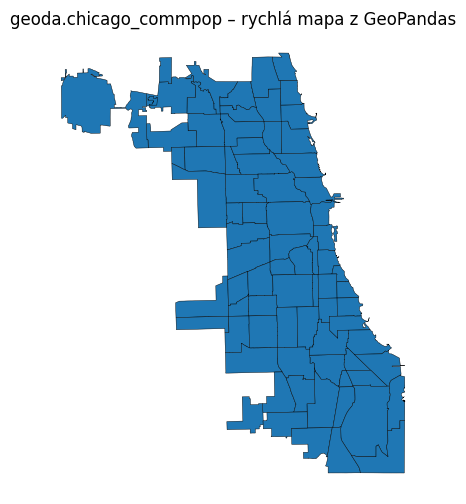

In [6]:
# ── 6) Rychlá vizualizace
ax = gpd_df.plot(figsize=(6,6), edgecolor="black", linewidth=0.3)
ax.set_title("geoda.chicago_commpop – rychlá mapa z GeoPandas")
ax.set_axis_off()

In [7]:
# ── 7) Souhrnný výpis (POVINNÝ dle našeho pravidla)
print("\nco všechno bylo provedeno:")
print("1) Nainstalovány balíčky: geopandas, geodatasets, pyogrio, shapely, fiona.")
print("2) Naimportovány moduly jako gpd/gds.")
print(f"3) Nalezena a použita cesta k souboru: {data}")
print(f"4) Načten GeoDataFrame: {gpd_df.shape[0]} řádků, {gpd_df.shape[1]} sloupců.")
print(f"5) CRS: {gpd_df.crs}. Typy geometrií: {dict(geom_counts)}")
print("6) Vykreslena rychlá mapa pomocí .plot().")


co všechno bylo provedeno:
1) Nainstalovány balíčky: geopandas, geodatasets, pyogrio, shapely, fiona.
2) Naimportovány moduly jako gpd/gds.
3) Nalezena a použita cesta k souboru: /root/.cache/geodatasets/chicago_commpop.zip.unzip/chicago_commpop/chicago_commpop.geojson
4) Načten GeoDataFrame: 77 řádků, 9 sloupců.
5) CRS: EPSG:4326. Typy geometrií: {'MultiPolygon': np.int64(77)}
6) Vykreslena rychlá mapa pomocí .plot().


[INFO] Sloupce s demografickými údaji:
Index(['community', 'NID', 'POP2010', 'POP2000', 'POPCH', 'POPPERCH',
       'popplus', 'popneg', 'geometry'],
      dtype='object')


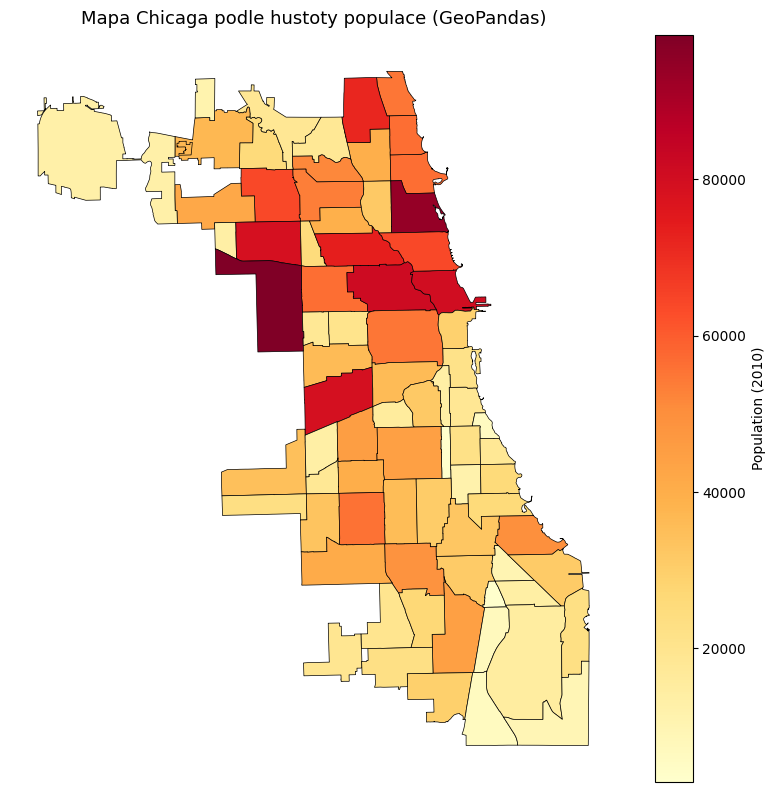


co všechno bylo provedeno:
- Vykreslena mapa Chicaga podle sloupce 'POP2010'
- Použita barevná škála 'YlOrRd' (žlutá → červená)
- Přidána legenda a černé ohraničení polygonů


In [8]:
# === Vylepšená vizualizace datasetu geoda.chicago_commpop ===

import matplotlib.pyplot as plt

# Ověříme, jaké sloupce obsahují populaci:
print("[INFO] Sloupce s demografickými údaji:")
print(gpd_df.columns)

# Většinou bývá sloupec 'POP2010' nebo podobný
if "POP2010" in gpd_df.columns:
    population_col = "POP2010"
else:
    population_col = gpd_df.columns[-2]  # pro jistotu druhý poslední

# Nastavení mapy
fig, ax = plt.subplots(figsize=(8, 8))
gpd_df.plot(
    column=population_col,          # barvy podle populace
    cmap="YlOrRd",                  # barevná paleta žluto–červená
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Population (2010)", "orientation": "vertical"},
    ax=ax
)

# Popisky a vzhled
ax.set_title("Mapa Chicaga podle hustoty populace (GeoPandas)", fontsize=13, pad=10)
ax.set_axis_off()

plt.tight_layout()
plt.show()

# === Shrnutí provedených kroků ===
print("\nco všechno bylo provedeno:")
print(f"- Vykreslena mapa Chicaga podle sloupce '{population_col}'")
print("- Použita barevná škála 'YlOrRd' (žlutá → červená)")
print("- Přidána legenda a černé ohraničení polygonů")